In [2]:
#Load the dataset into a data analysis tool or programming environment 

import pandas as pd
df = pd.read_csv('sales_data_with_discounts.csv')
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [3]:
#Identify numerical columns in the dataset.

numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [4]:
#Calculate the mean, median, mode, and standard deviation for these columns.

stats = df[numerical_cols].agg(['mean', 'median', lambda x: x.mode().iloc[0], 'std']).transpose()
stats.columns = ['Mean', 'Median', 'Mode', 'Standard Deviation']
print("Basic Statistical Measures for Numerical Columns:")
print(stats)

Basic Statistical Measures for Numerical Columns:
                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


C:\Users\saisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

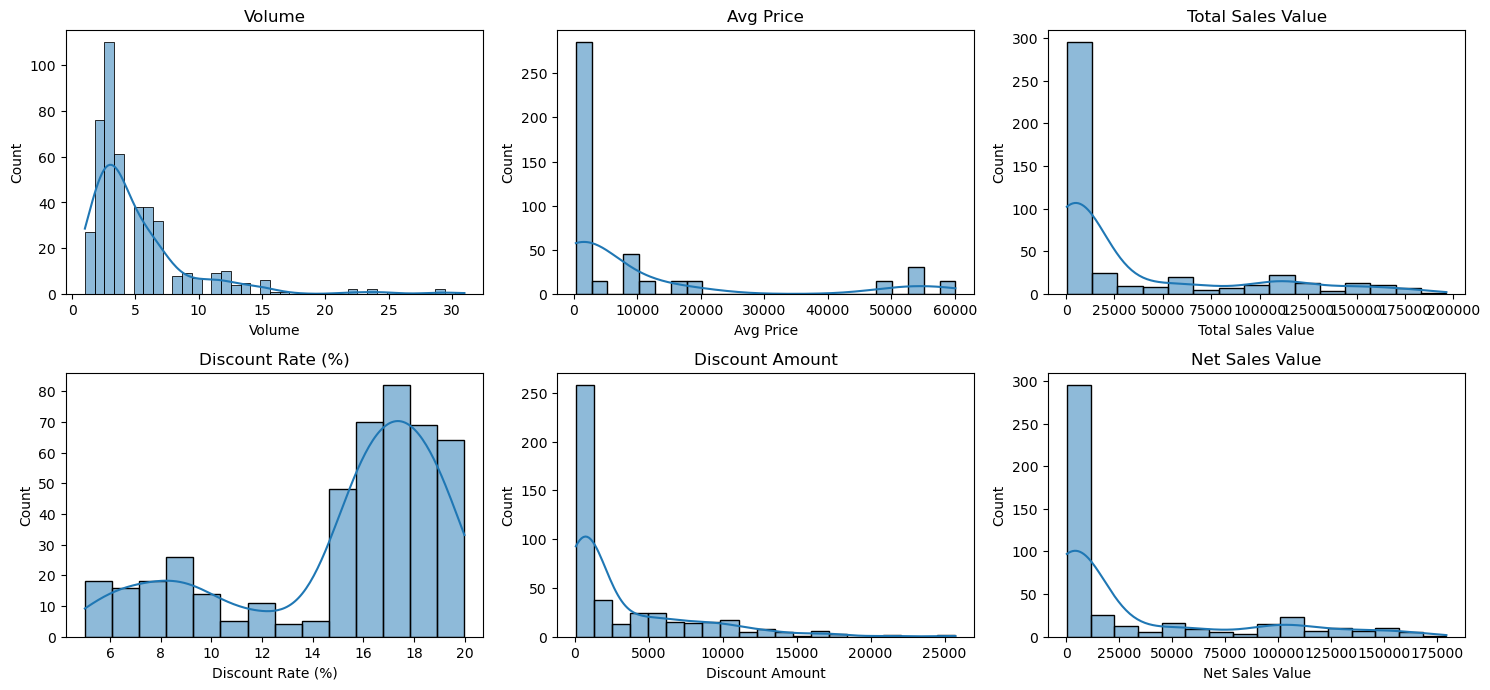

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each numerical column

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.tight_layout()
plt.show()

In [7]:
# Calculate skewness for each numerical column

skewness = df[numerical_cols].skew()
skewness

Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64

In [8]:
# Identify outliers using IQR method and provide inferences

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier values: {outliers[col].values}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print("")

Column: Volume
Number of outliers: 44
Outlier values: [15 13 11 29 13 24 14 12 25 15 11 15 14 12 12 12 22 11 11 12 12 14 11 11
 15 31 12 16 24 11 12 12 22 11 13 15 12 14 14 11 29 15 13 17]
Lower bound: -1.5, Upper bound: 10.5

Column: Avg Price
Number of outliers: 60
Outlier values: [49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100
 49100 54100 55100 60100 49100 54100 55100 60100 49100 54100 55100 60100]
Lower bound: -13987.5, Upper bound: 24552.5

Column: Total Sales Value
Number of outliers: 36
Outlier values: [181500 147300 180300 133100 147300 165300 180300 196400 147300 147300
 162300 162300 145200 147300 162300 165300 180300 169400 147300 181500
 140700 147300 165300 145200 147300 165300 180300 165300 180300 140700
 147300 133100 147300 15730

In [9]:
# Provide inferences

print("Inferences:")
print("1. Skewness:")
for col, val in skewness.items():
    if abs(val) > 1:
        print(f"   - Column '{col}' is highly skewed ({val:.2f}).")
    elif abs(val) > 0.5:
        print(f"   - Column '{col}' is moderately skewed ({val:.2f}).")
    else:
        print(f"   - Column '{col}' is approximately symmetric ({val:.2f}).")

print("\n2. Outliers:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_outliers = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    if num_outliers > 0:
        print(f"   - Column '{col}' has {num_outliers} outliers.")

Inferences:
1. Skewness:
   - Column 'Volume' is highly skewed (2.73).
   - Column 'Avg Price' is highly skewed (1.91).
   - Column 'Total Sales Value' is highly skewed (1.53).
   - Column 'Discount Rate (%)' is highly skewed (-1.06).
   - Column 'Discount Amount' is highly skewed (1.91).
   - Column 'Net Sales Value' is highly skewed (1.54).

2. Outliers:
   - Column 'Volume' has 44 outliers.
   - Column 'Avg Price' has 60 outliers.
   - Column 'Total Sales Value' has 36 outliers.
   - Column 'Discount Rate (%)' has 45 outliers.
   - Column 'Discount Amount' has 24 outliers.
   - Column 'Net Sales Value' has 35 outliers.


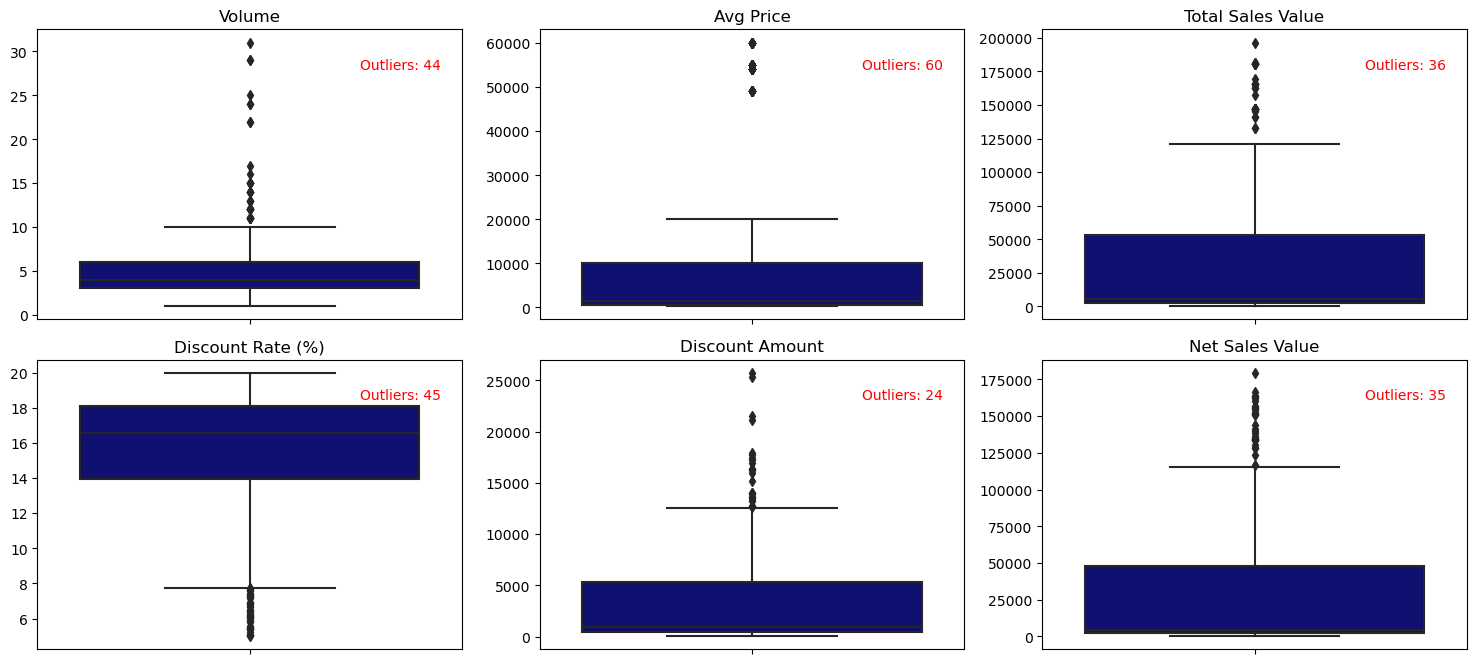

In [10]:
# Plot boxplots for each numerical column

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='navy')
    plt.title(col)
    plt.ylabel("")
    
# Calculate outliers using IQR method

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    plt.text(0.95, 0.9, f"Outliers: {len(outliers)}", transform=plt.gca().transAxes, ha='right', va='top', color='red')
plt.tight_layout()
plt.show()

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

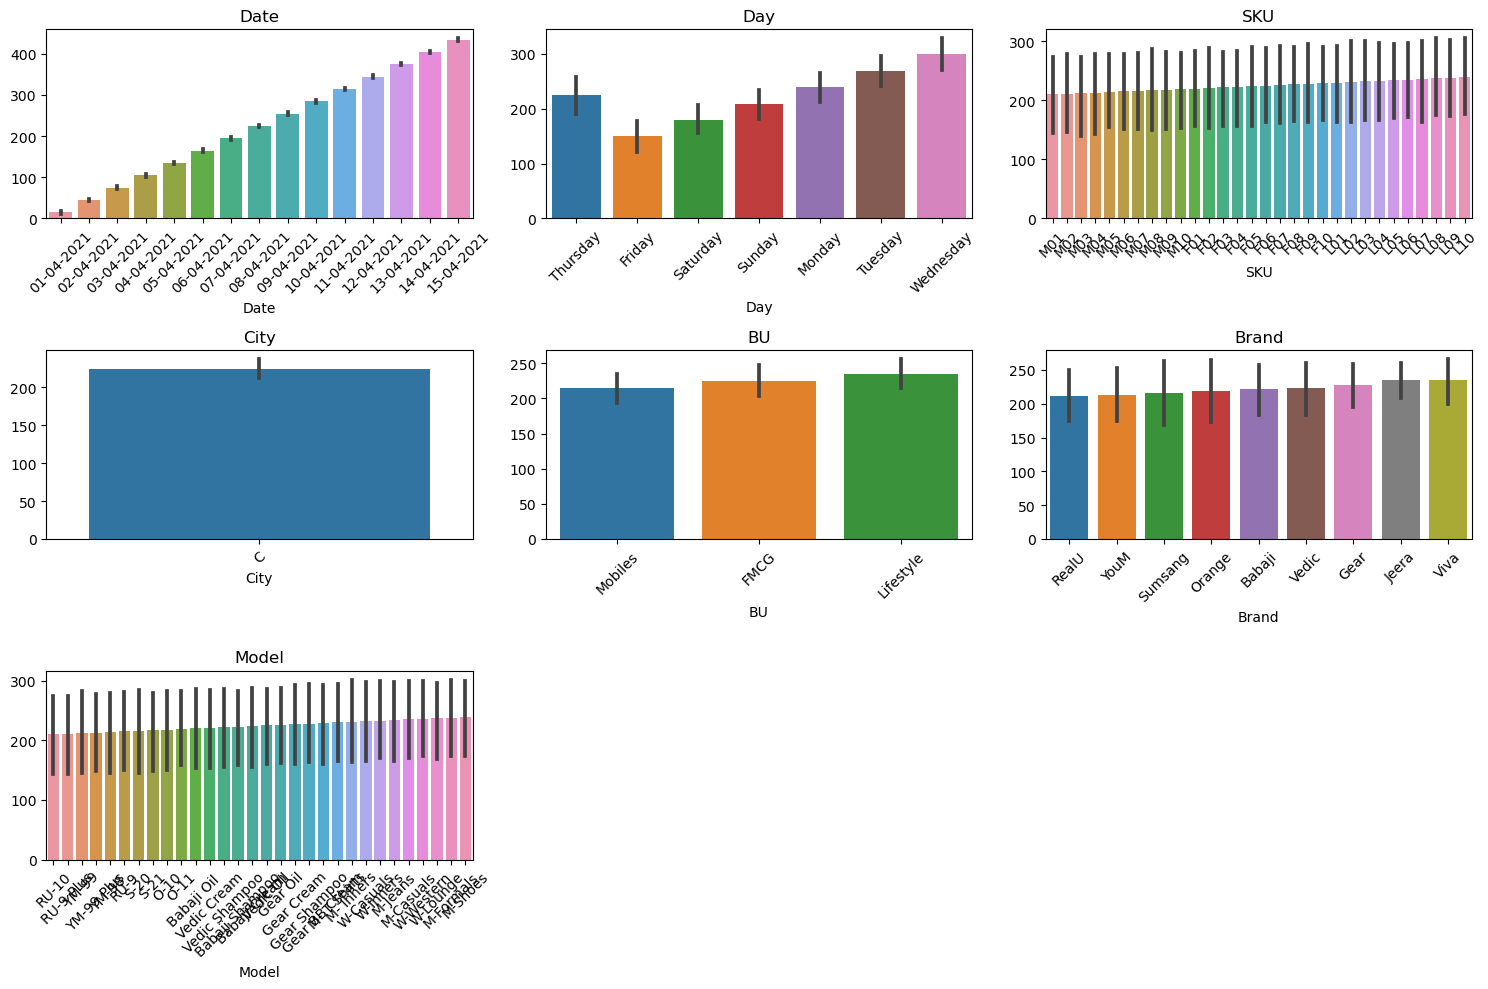

In [12]:
# Plot bar charts for each categorical column

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.barplot(data=df, x=col, y=df.index)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Standardize numerical columns

df_standardized = df.copy()
for col in numerical_cols:
    mu = df[col].mean()  # Calculate mean for the column
    sigma = df[col].std()  # Calculate standard deviation for the column
    df_standardized[col] = (df[col] - mu) / sigma  # Standardize the column

# Display the standardized DataFrame

df_standardized

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.347417,Mobiles,RealU,RU-10,0.091072,2.922469,-0.829365,3.948422,2.801638
1,01-04-2021,Thursday,M02,C,1.165831,Mobiles,RealU,RU-9 Plus,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,01-04-2021,Thursday,M03,C,0.456880,Mobiles,YouM,YM-99,0.312312,1.561038,-1.350129,1.621190,1.543957
3,01-04-2021,Thursday,M04,C,0.220563,Mobiles,YouM,YM-99 Plus,0.533552,1.717365,-1.947555,1.112568,1.763847
4,01-04-2021,Thursday,M05,C,-0.488389,Mobiles,YouM,YM-98,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,-0.724706,Lifestyle,Jeera,M-Casuals,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,15-04-2021,Thursday,L07,C,0.220563,Lifestyle,Viva,W-Western,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,15-04-2021,Thursday,L08,C,-0.724706,Lifestyle,Viva,W-Lounge,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,15-04-2021,Thursday,L09,C,-0.488389,Lifestyle,Jeera,M-Formals,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


C:\Users\saisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

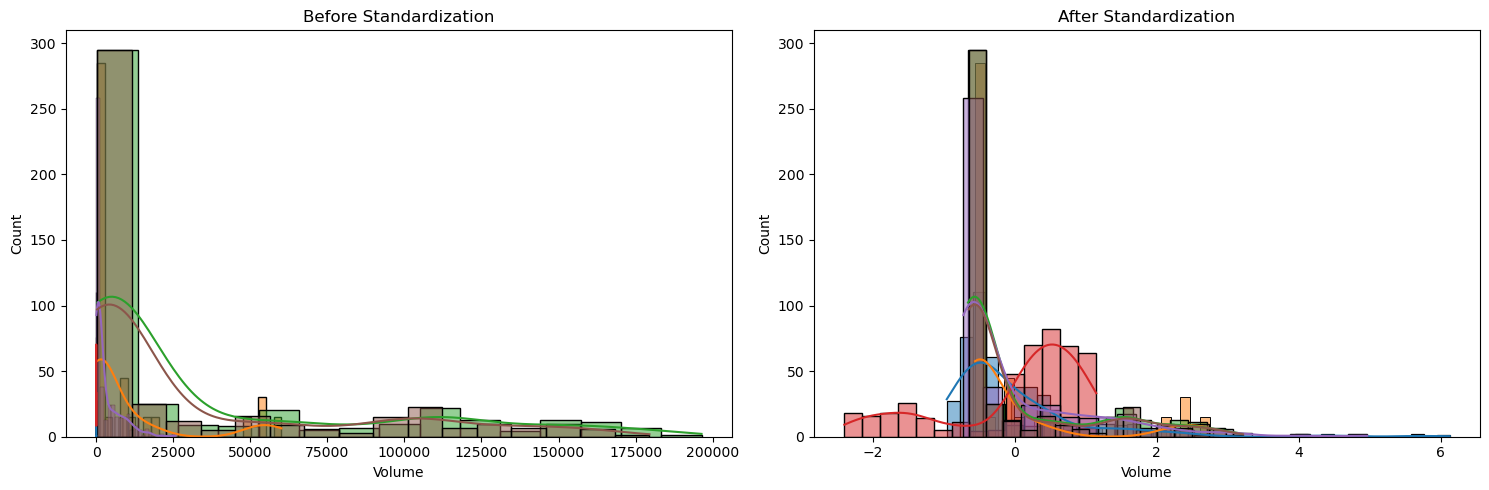

In [14]:
# Plot histograms for each numerical column before and after standardization

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title('Before Standardization')

    plt.subplot(1, 2, 2)
    sns.histplot(df_standardized[col], kde=True)
    plt.title('After Standardization')

plt.tight_layout()
plt.show()

In [15]:
# Apply one-hot encoding to categorical columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, dtype='int')

#Display a portion of the transformed dataset.

df_encoded

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,10100,101000,11.560498,11676.102961,89323.897039,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,16100,112700,9.456886,10657.910157,102042.089843,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,20100,120600,6.935385,8364.074702,112235.925298,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17.995663,4372.946230,19927.053770,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,6,2600,15600,17.057027,2660.896242,12939.103758,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,2,1600,3200,18.965550,606.897606,2593.102394,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,3,1900,5700,16.793014,957.201826,4742.798174,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
